In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# --- Custom loss function ---
def custom_loss(y_true, y_pred):
    epsilon = 1e-7
    y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)
    loss = -(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    return tf.reduce_mean(loss)

In [3]:
# --- Generate synthetic dataset ---
X_train = np.random.random((1000, 10))
y_train = np.random.randint(0, 2, size=(1000, 1))

X_test = np.random.random((200, 10))
y_test = np.random.randint(0, 2, size=(200, 1))

# --- Build the model ---
model = models.Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# --- Compile the model with custom loss ---
model.compile(optimizer='adam',
              loss=custom_loss,
              metrics=['accuracy'])

# --- Train the model ---
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5420 - loss: 0.6930 - val_accuracy: 0.4900 - val_loss: 0.6965
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5299 - loss: 0.6885 - val_accuracy: 0.4950 - val_loss: 0.6959
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5435 - loss: 0.6887 - val_accuracy: 0.5150 - val_loss: 0.6951
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5289 - loss: 0.6903 - val_accuracy: 0.5250 - val_loss: 0.6949
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5209 - loss: 0.6876 - val_accuracy: 0.5050 - val_loss: 0.6949
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5329 - loss: 0.6844 - val_accuracy: 0.5400 - val_loss: 0.6936
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5225 - loss: 0.6860 - val_accuracy: 0.5150 - val_loss: 0.6936
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5486 - loss: 0.6813 - val_accuracy: 0.5300 - val_loss

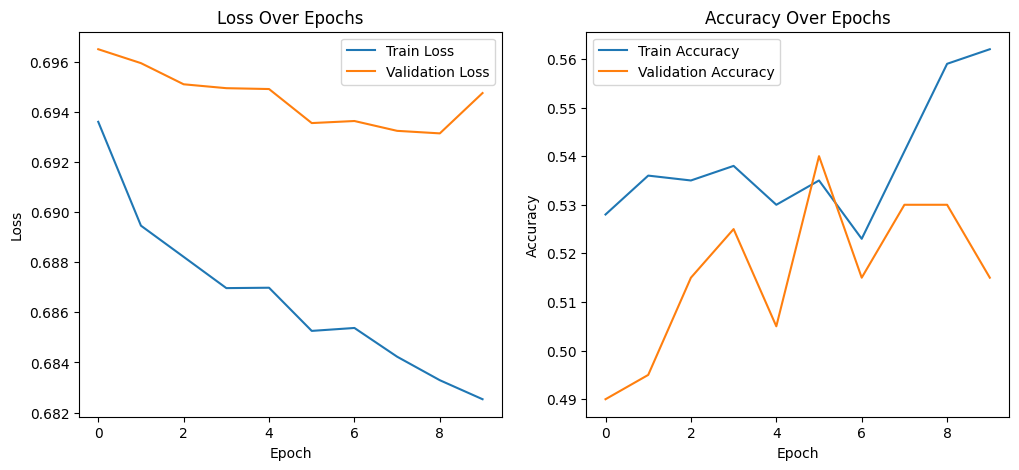

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


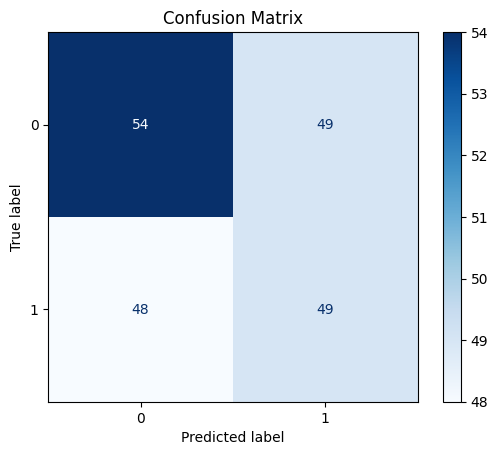

In [4]:
# --- Plot training history ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# --- Evaluate with confusion matrix ---
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()